In [29]:
import pandas as pd

In [30]:
filename = "no_v10no_e9.txt"
file_path = ".\\input\\" + filename
file_path

'.\\input\\no_v10no_e9.txt'

In [31]:
# 读入图
header_list = ["from", "to", "probability", "weight"]
protein_info = pd.read_table(file_path, names=header_list, sep=" ")

In [32]:
# 输入前5列数据
protein_info.tail()

from  to  probability  weight
4     3   4            1       1
5     3   7            1       1
6     4   7            1       1
7     6   7            1       1
8     7   8            1       1

In [33]:
# 导入igraph包
import igraph as ig

In [34]:
# 先判断节点是否在图中，如果不在则添加新节点
def add_vertice_byname(v_name):
    global g
    if v_name not in g.vs["name"]:
        g.add_vertex(1)
        g.vs[g.vcount() - 1]["name"] = v_name
        
def add_vertices_byname(v_name_list):
    for v_name in v_name_list:
        add_vertice_byname(v_name)

In [35]:
protein_info["from"].head()

0    0
1    0
2    1
3    1
4    3
Name: from, dtype: int64

In [36]:
g = ig.Graph()
# 通过名字添加节点
g.vs["name"] = ""
add_vertices_byname(protein_info["from"].astype(str))
add_vertices_byname(protein_info["to"].astype(str))

In [37]:
pd.Series(["a"])

0    a
dtype: object

In [38]:
# 形成边，二元组列表
edges_name = zip(protein_info["from"].astype(str), protein_info["to"].astype(str))
edges_name = list(edges_name)

In [39]:
# 根据节点名字添加边
g.add_edges(edges_name)

In [40]:
# 输出总体信息
g.summary()

'IGRAPH UN-- 8 9 -- \n+ attr: name (v)'

In [44]:
# layout = g.layout_kamada_kawai()
layout = g.layout_sugiyama()
# layout = g.layout_fruchterman_reingold()

In [45]:
image_path = ".//result//" + filename.split(".")[0] + "." + "png"

8


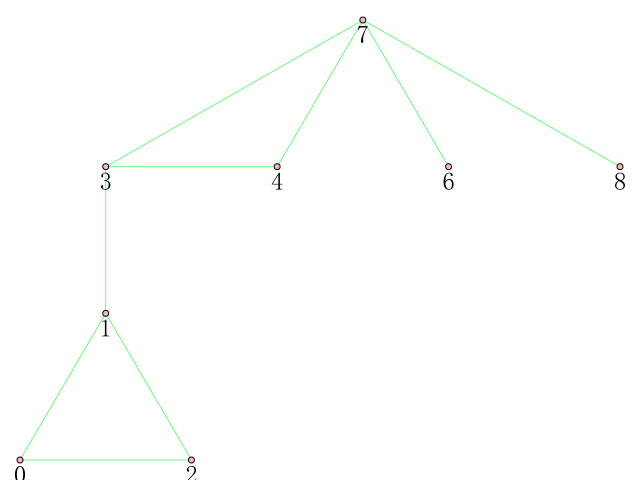

In [49]:
g.vs["label"] = g.vs["name"]
print(g.vcount())
# vertex_label_size = 12
ig.plot(g, target=image_path, layout = layout, bbox=(640,480),
       vertex_color = "rgb(250, 180, 190)", vertex_label_color = "rgb(0, 0, 0)", edge_color = "rgb(110, 252, 125)",
        vertex_label_size = 25, vertex_label_dist = 2, vertex_size = 6)